In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import os
from matplotlib.ticker import MaxNLocator

In [2]:
def row_norm0(ls_vec):
    #res = ls_vec / sum(ls_vec)
    #res = ls_vec**0.5 / sum(ls_vec**0.5)
    res = ls_vec
    return res

def row_norm(lss):
    tmp = np.zeros(lss.shape)
    for i in range(lss.shape[0]):
        tmp[i] = row_norm0(lss[i])
    return tmp

def get_thresh(lss, sparsity=0.1):
    tmp = row_norm(lss)
    tmp_srt = np.sort(tmp.reshape(-1))[::-1]
    idx = int(lss.shape[0]*lss.shape[1]*sparsity)+1
    th = tmp_srt[idx]
    return th

def ext_rel(ls_vec, th):
    norm_ls = row_norm0(ls_vec)
    #print(norm_ls)
    res = np.where(norm_ls > th)
    return res[0]

def print_connect(lss, th=0.6):
    for j in range(nodes):
        i = ext_rel(lss[j], th)
        print(str(i) + ' -> ' + str(j))
        
def draw_graph(lss, th=0.6, save=None, t=None, vip_list=['CDK1', 'ID1', 'MYOG', 'MYH2', 'MEF2C']):
    G=nx.DiGraph()
    for j in range(nodes):
        G.add_node(gene_name[j])
    for j in range(nodes):        
        for i in ext_rel(lss[j], th):
            G.add_edge(gene_name[i], gene_name[j])
    
    fig = plt.figure(figsize=(10,10))    
    npos=nx.circular_layout(G)
    
    vip_e = [(i, j) for (i, j) in G.edges() if i in vip_list or j in vip_list]
    nx.draw_networkx_edges(G, npos, vip_e, alpha=1, edge_color = 'b', width=3)
    nx.draw_networkx_edges(G, npos, alpha=0.3)
    
    nx.draw_networkx_nodes(G, npos,alpha=0.5,node_size=1, node_color='b')
#     nx.draw_networkx_nodes(G, npos,alpha=1,node_size=20,nodelist = ['CDK1'], node_color='r', label='CDK1')
#     nx.draw_networkx_nodes(G, npos,alpha=1,node_size=20,nodelist = ['ID1'], node_color='y', label='ID1')
#     nx.draw_networkx_nodes(G, npos,alpha=1,node_size=20,nodelist = ['MYOG'], node_color='g', label='MYOG')
#     nx.draw_networkx_nodes(G, npos,alpha=1,node_size=20,nodelist = ['MYH2'], node_color='k', label='MYH2')
#     nx.draw_networkx_nodes(G, npos,alpha=1,node_size=20,nodelist = ['MEF2C'], node_color='m', label='MEF2C')
    
    clr_str = 'rygmk'
    for k in range(len(vip_list)):
        g = vip_list[k]
        nx.draw_networkx_nodes(G, npos,alpha=1,node_size=20,nodelist = [g], node_color=clr_str[k], label=g)
    plt.legend(loc='upper left')
    
    if t:
        plt.xlabel('t = %03d' % t)
    if save:
        plt.savefig(save)
    plt.show()
    plt.close(fig)
    
    vipl = len(vip_list)
    vip_cnt = np.zeros(vipl)
    
    for (i, j) in G.edges():
        for k in range(vipl):
            if vip_list[k]==i or vip_list[k]==j:
                vip_cnt[k] += 1
                
    return vip_cnt

In [3]:
mf_fname = '/home/linaiqi/Lab/data/gene/monocle/processed/gene.txt'

with open(mf_fname) as f:
    gene_name = f.readline().strip().split()
    
nodes=len(gene_name)

# m10 cc40

In [4]:
nw_fname='/home/linaiqi/Lab//data/gene/res/monocle/monocle_cc50_m10_width10_interv10_data12'
fig_path='./res/monocle/'

#vip_list = ['CDK1', 'ID1', 'MYOG', 'MYH2', 'MEF2C']
vip_list = ['ID1', 'MYOG', 'MEF2C']

with open(nw_fname, 'rb') as f:
    nps = np.load(f)
    nw, pred, var = nps['nw'], nps['pred'], nps['var']

In [5]:
print(nw.shape)

(216, 200, 200)


/home/linaiqi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/linaiqi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


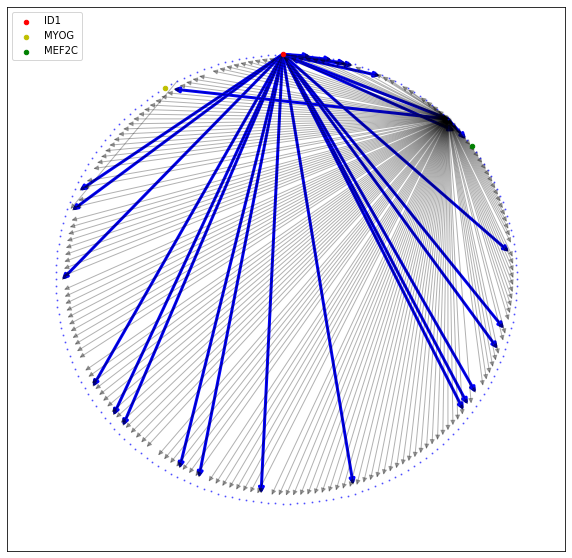

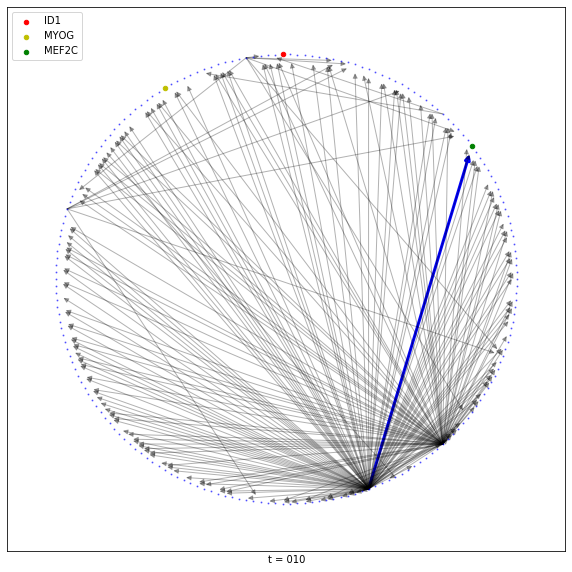

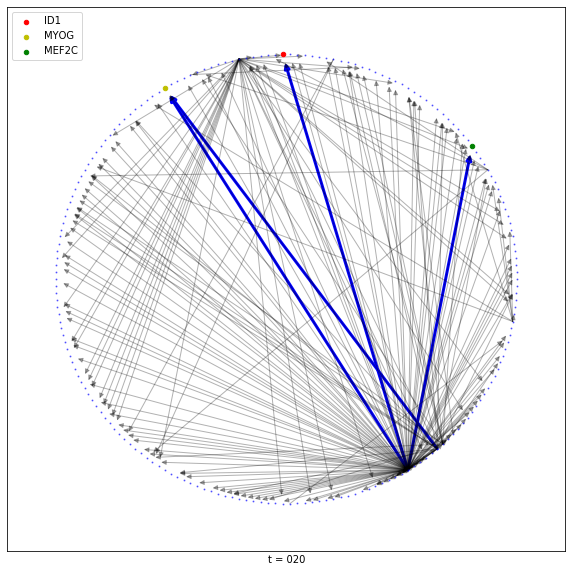

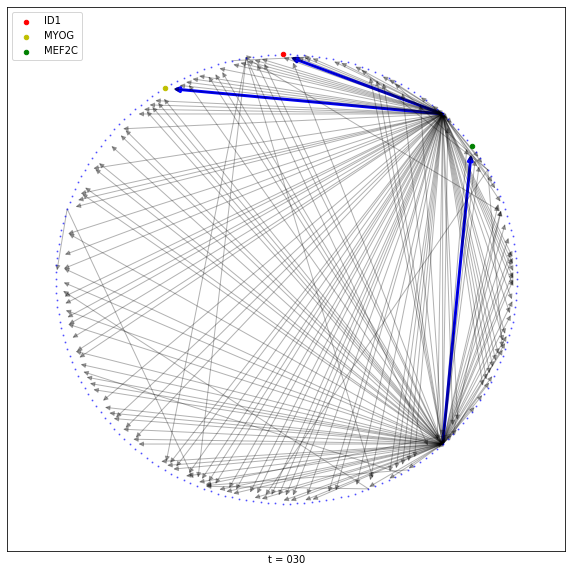

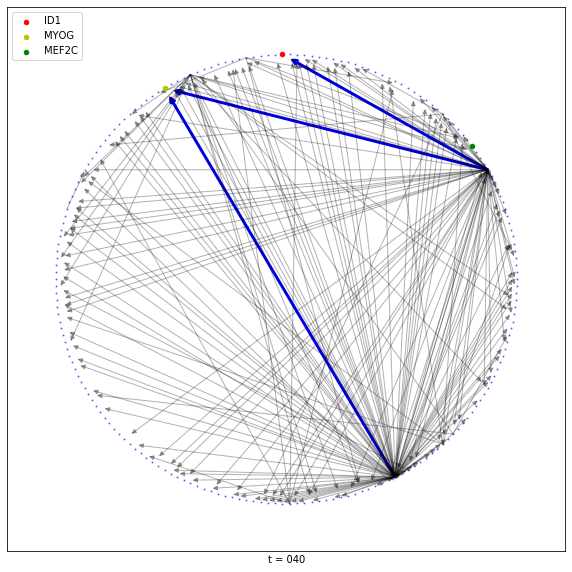

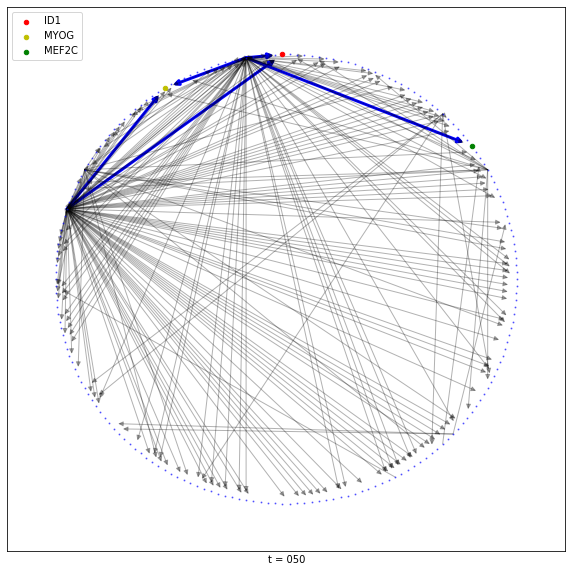

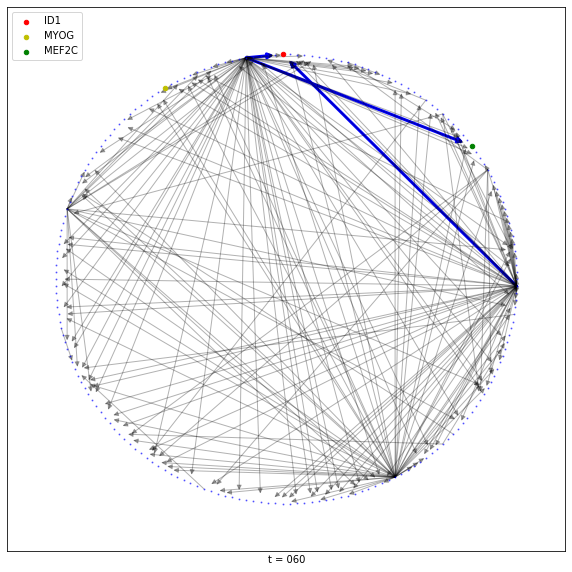

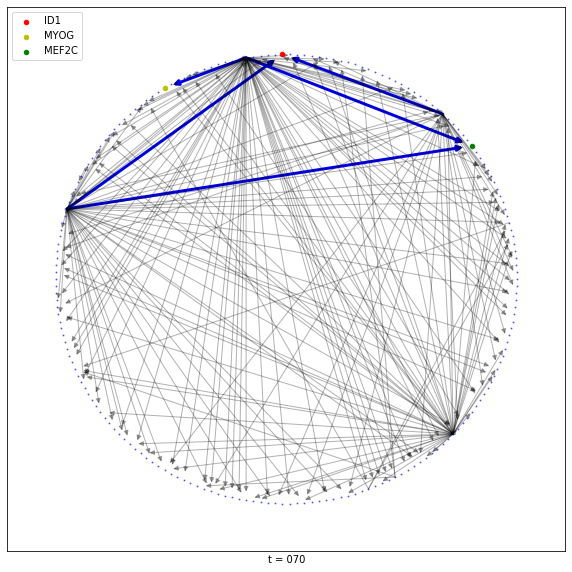

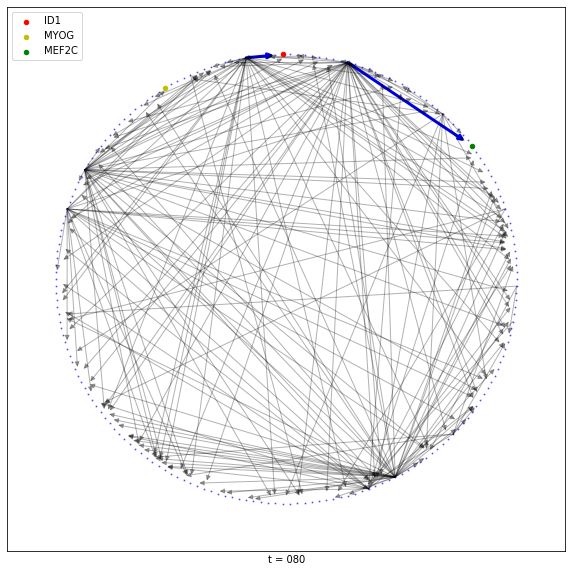

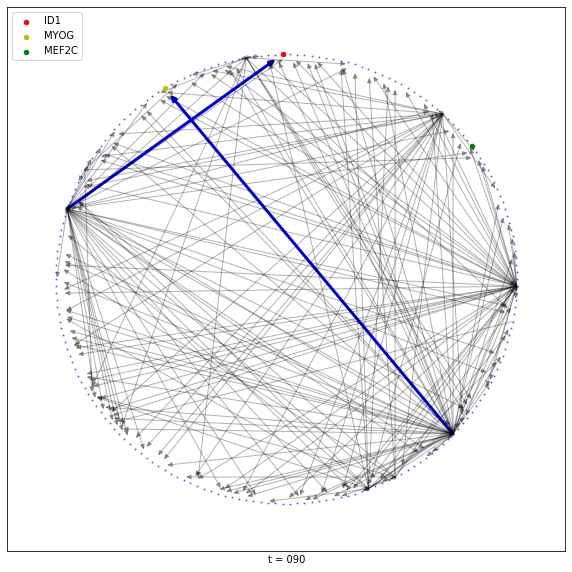

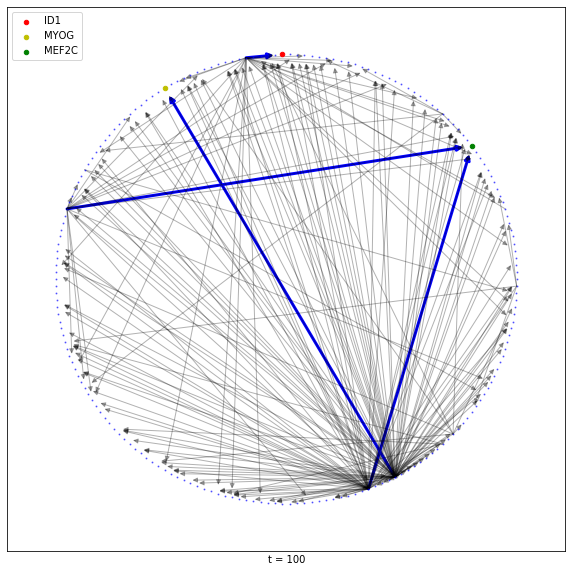

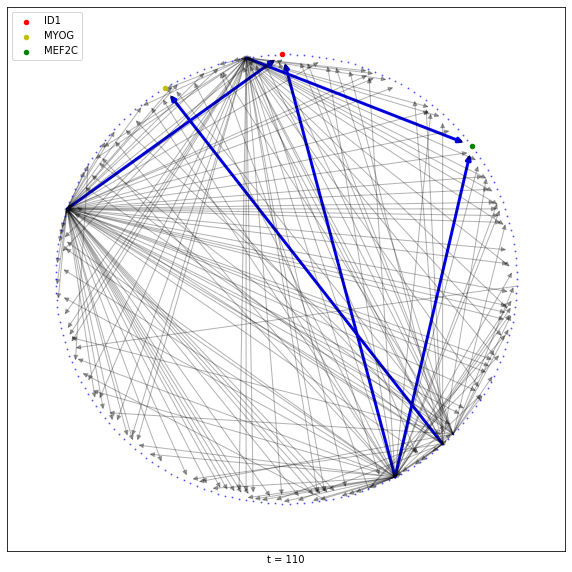

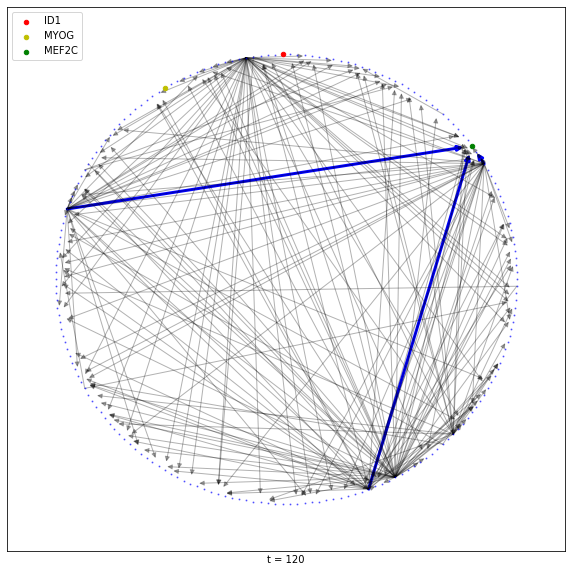

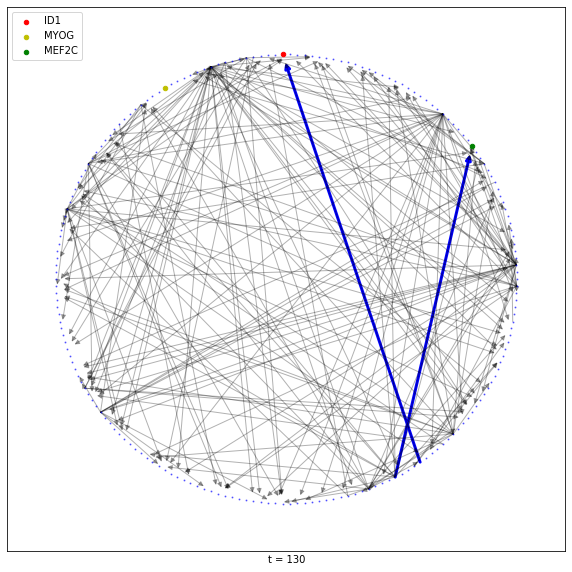

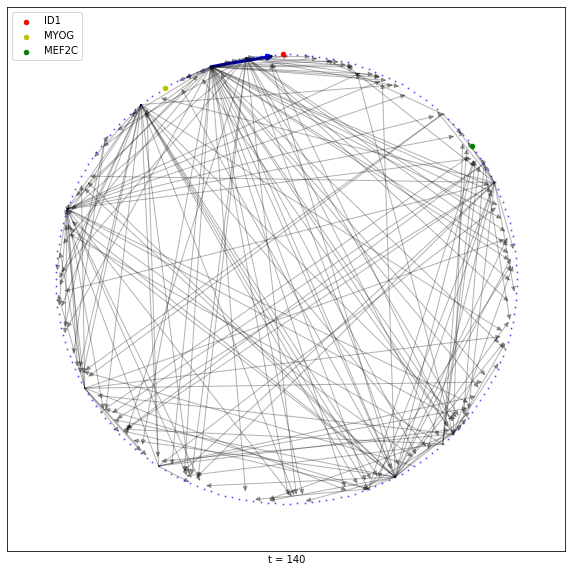

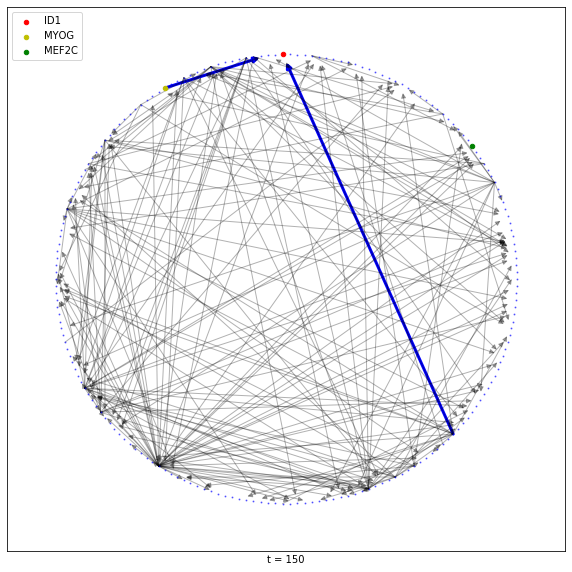

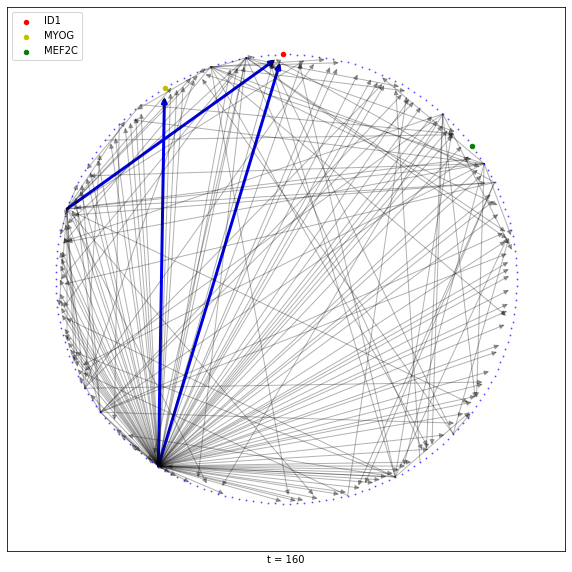

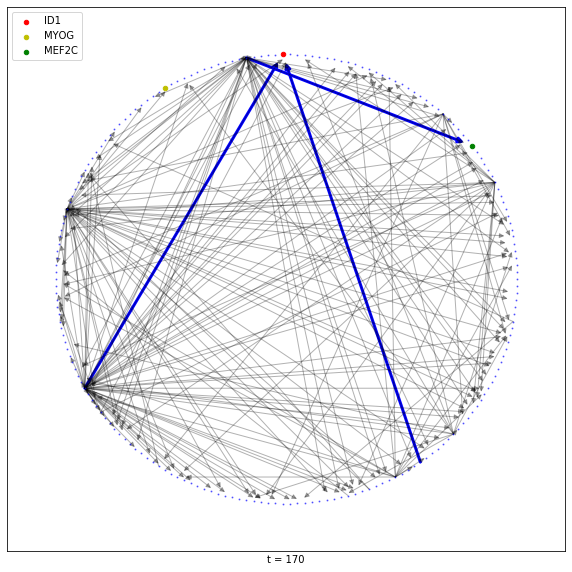

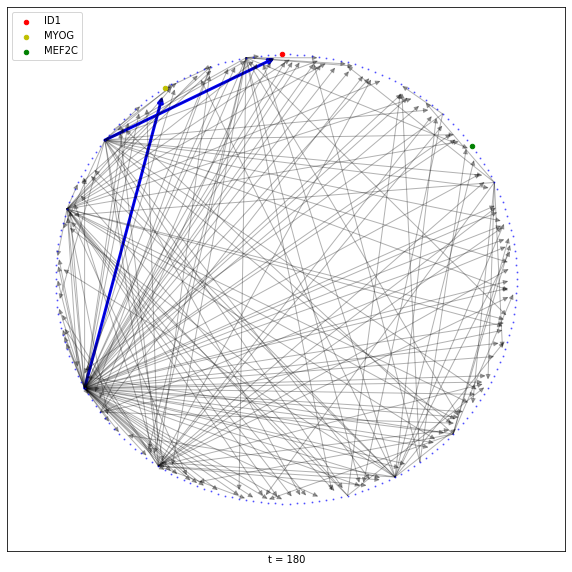

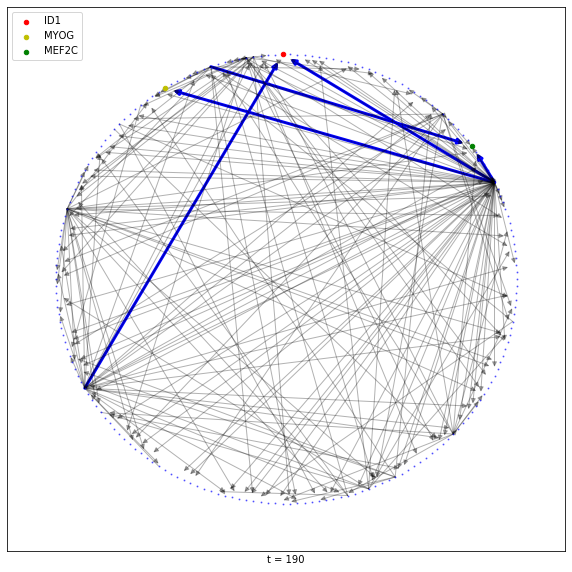

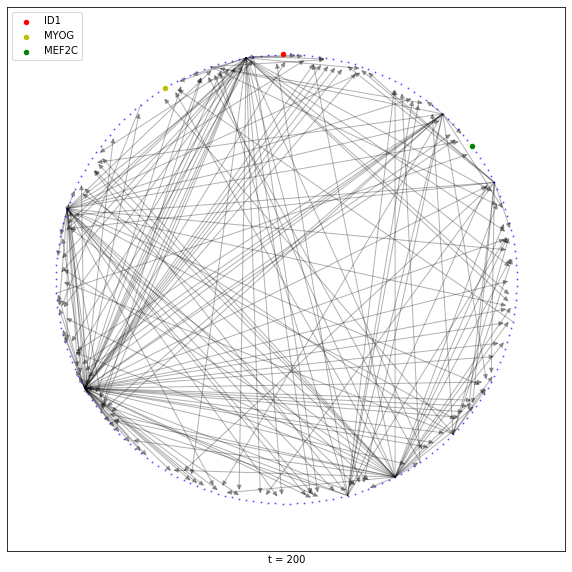

In [6]:
tt = 201 #nw.shape[0]
top_e = 1.0/(nodes)
interv = 10
vip_cnt_lst = []

# os.mkdir(fig_path)
for t in range(0, tt, interv):
#     print('Time step: %d' % t)
#     e = []
    th = get_thresh(nw[t], sparsity=top_e)
#     for j in range(nodes):
#         for i in ext_rel(nw[t,j], th):
#             e.append((gene_name[i], gene_name[j]))
    #print(e)
    vip_cnt = draw_graph(nw[t], th=th, save='%s%d' % (fig_path, t), t=t, vip_list=vip_list)
    vip_cnt_lst += [vip_cnt]

In [7]:
# make gif
from PIL import Image 

images=[]

for t in range(0, tt, interv):
    im = Image.open('%s%d.png' % (fig_path, t+1)) 
    images.append(im)
    
images[0].save('%s/ani.gif' % fig_path,
               save_all=True, append_images=images[1:], optimize=False, duration=1000, loop=1)

<Figure size 432x288 with 0 Axes>

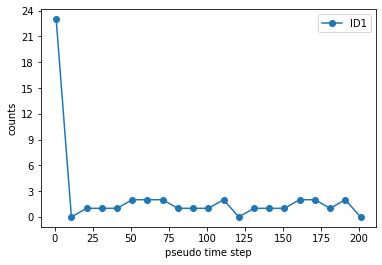

<Figure size 432x288 with 0 Axes>

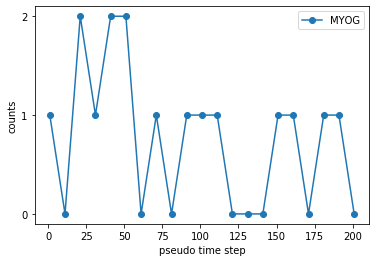

<Figure size 432x288 with 0 Axes>

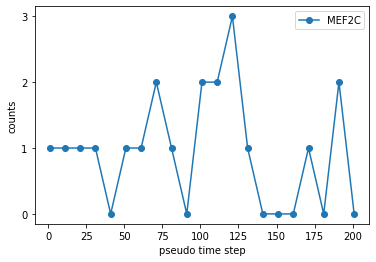

In [8]:
vip_cnt_mat = np.asarray(vip_cnt_lst)

xs = np.arange(0,tt,interv)+1
for i in range(len(vip_list)):
    plt.figure()
    ax = plt.figure().gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.plot(xs, vip_cnt_mat[:, i], 'o-', label=vip_list[i])
    plt.legend()
    plt.xlabel('pseudo time step')
    plt.ylabel('counts')
    plt.show()

In [9]:
vip_cnt_mean = np.zeros((4, len(vip_list)))

vip_cnt_mean[0, :] = np.mean(vip_cnt_mat[:5, :], axis=0)
vip_cnt_mean[1, :] = np.mean(vip_cnt_mat[5:10, :], axis=0)
vip_cnt_mean[2, :] = np.mean(vip_cnt_mat[10:15, :], axis=0)
vip_cnt_mean[3, :] = np.mean(vip_cnt_mat[15:20, :], axis=0)

<Figure size 432x288 with 0 Axes>

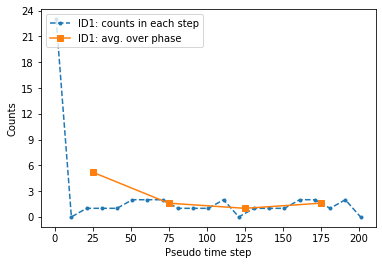

<Figure size 432x288 with 0 Axes>

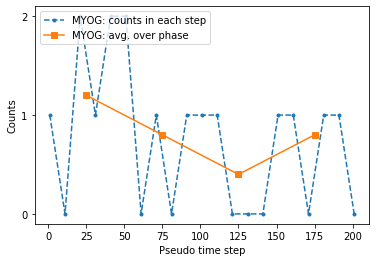

<Figure size 432x288 with 0 Axes>

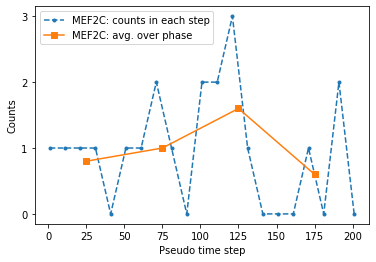

In [11]:
for i in range(len(vip_list)):
    plt.figure()
    ax = plt.figure().gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.plot(xs, vip_cnt_mat[:, i], '.--', label=vip_list[i]+ ': counts in each step')
    plt.plot([25, 75, 125, 175], vip_cnt_mean[:, i], 's-', label=vip_list[i]+ ': avg. over phase')
    plt.legend(loc='upper left')
    plt.xlabel('Pseudo time step')
    plt.ylabel('Counts')
    plt.show()